### Predict the wine type and quality based on physicochemical properties

Dataset : https://archive.ics.uci.edu/ml/datasets/wine+quality

**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

**Output variable (based on sensory data):**

12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# Load datasets
red_wine = pd.read_csv('Datasets/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('Datasets/winequality-white.csv', sep = ';')

In [3]:
red_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
white_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [6]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
#Descriptive Statistics
pd.concat([round(red_wine.describe(),2).T, round(white_wine.describe(),2).T], axis=1, 
          keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

In [8]:
# Add new attirbute:'wine type' - first step to merge
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [9]:
#checking any null values
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [10]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [11]:
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [12]:
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [13]:
# Merge the datasets
wines_df = pd.concat([red_wine, white_wine])
# shuffle the rows inorder to randomize data points
wines_df = wines_df.sample(frac=1, random_state=4).reset_index(drop=True)

In [14]:
wines_df.shape

(6497, 13)

In [15]:
wines_df['quality'].unique()

array([6, 5, 7, 8, 3, 4, 9], dtype=int64)

In [16]:
# Add 'quality_label' based on the quality scores.
# 3 - 5: Low, 6 - 7: Medium, 7 - 9: High

wines_df['quality_label'] = wines_df['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')
wines_df['quality_label'] = pd.Categorical(wines_df['quality_label'], categories=['low','medium','high'])

In [17]:
wines_df['quality_label'].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [18]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,12.5,6,white,medium
1,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,red,low
2,5.6,0.19,0.27,0.9,0.040,52.0,103.0,0.99026,3.50,0.39,11.2,5,white,low
3,6.4,0.18,0.31,1.6,0.049,36.0,127.0,0.99340,3.60,0.67,10.4,7,white,medium
4,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,red,low


### Wine Attributes and Properties


- **fixed acidity:** It indicates the amount of tartaric acid in wine and is measured. This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** It indicates the amount of acetic acid in the wine.
    Excess of volatile acids are undesirable and lead to unpleasant flavor. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. It indicates the amount of citric acid in the wine. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

In [19]:
sub_attribs = ['alcohol', 'volatile acidity', 'pH', 'quality']
low = round(wines_df[wines_df['quality_label'] == 'low'][sub_attribs].describe(),2)
medium = round(wines_df[wines_df['quality_label'] == 'medium'][sub_attribs].describe(),2)
high = round(wines_df[wines_df['quality_label'] == 'high'][sub_attribs].describe(),2)
pd.concat([low, medium, high], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine',
'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

In [20]:
from scipy import stats

In [21]:
# ANOVA test: alcohol levels
F, p = stats.f_oneway(wines_df[wines_df['quality_label'] == 'low']['alcohol'],
wines_df[wines_df['quality_label'] == 'medium']['alcohol'],
wines_df[wines_df['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
f"Statistic:{F}    p-value:{p}"

ANOVA test for mean alcohol levels across wine samples with different quality ratings


'Statistic:673.0745347231032    p-value:2.2715337450621843e-266'

In [22]:
# ANOVA test: pH levels
F, p = stats.f_oneway(wines_df[wines_df['quality_label'] == 'low']['pH'],
wines_df[wines_df['quality_label'] == 'medium']['pH'],
wines_df[wines_df['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH levels across wine samples with different quality ratings')
f"Statistic:{F}    p-value:{p}"

ANOVA test for mean pH levels across wine samples with different quality ratings


'Statistic:1.2363860803545201    p-value:0.2905002779768688'

Inference: There is a statistically significant difference in alcohol level means, but not in pH level means

Text(0, 0.5, 'Wine pH')

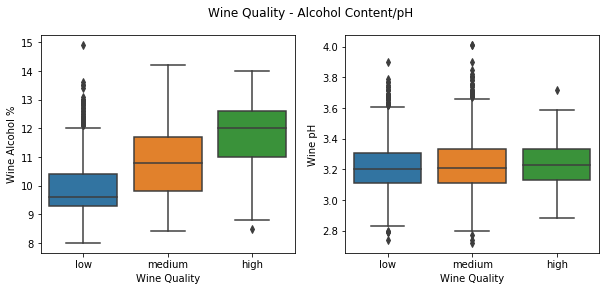

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol Content/pH')
#f.subplots_adjust(top=0.85, wspace=0.3)
sns.boxplot(x="quality_label", y="alcohol", data=wines_df, ax=ax1)
ax1.set_xlabel("Wine Quality")
ax1.set_ylabel("Wine Alcohol %")
sns.boxplot(x="quality_label", y="pH", data=wines_df, ax=ax2)
ax2.set_xlabel("Wine Quality")
ax2.set_ylabel("Wine pH")

### Univariate Analysis

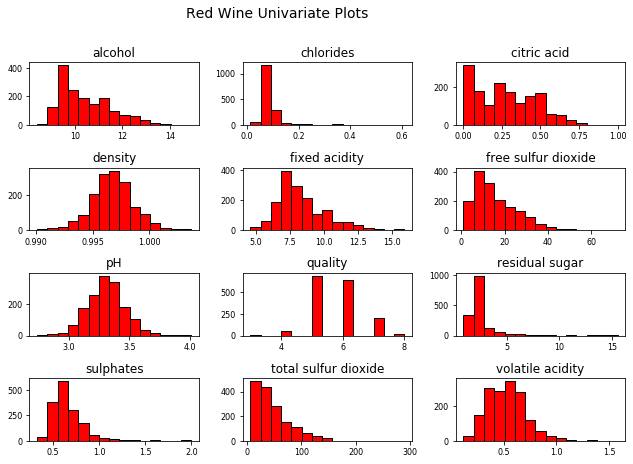

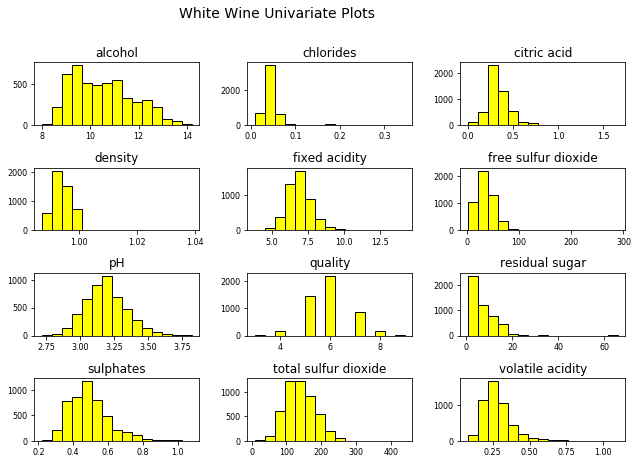

In [24]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.6, fontsize=14)
white_wine.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.6, fontsize=14)

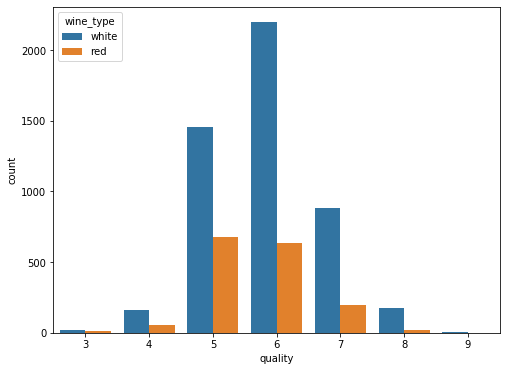

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=wines_df, x="quality", hue="wine_type")

### Multivariate Analysis

In [26]:
# Correlation 
wines_corr = wines_df.corr()
(wines_corr['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

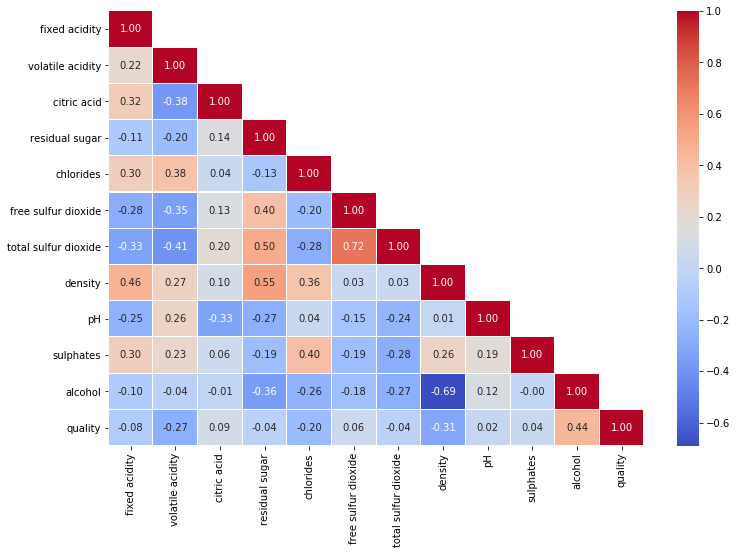

In [27]:
# Correlation heatmap
plt.figure(figsize=(12,8))
wines_corr = wines_corr.where(np.tril(np.ones(wines_corr.shape)).astype(np.bool))
sns.heatmap(round(wines_corr,2), annot=True, cmap="coolwarm",fmt='.2f',linewidths=.05)

- Strong +ve correlation: Between free sulfur dioxide & total sulfur dioxide (0.72)
- Strong -ve correlation: Between alcohol & density (-0.69)

In [28]:
wines_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label'],
      dtype='object')

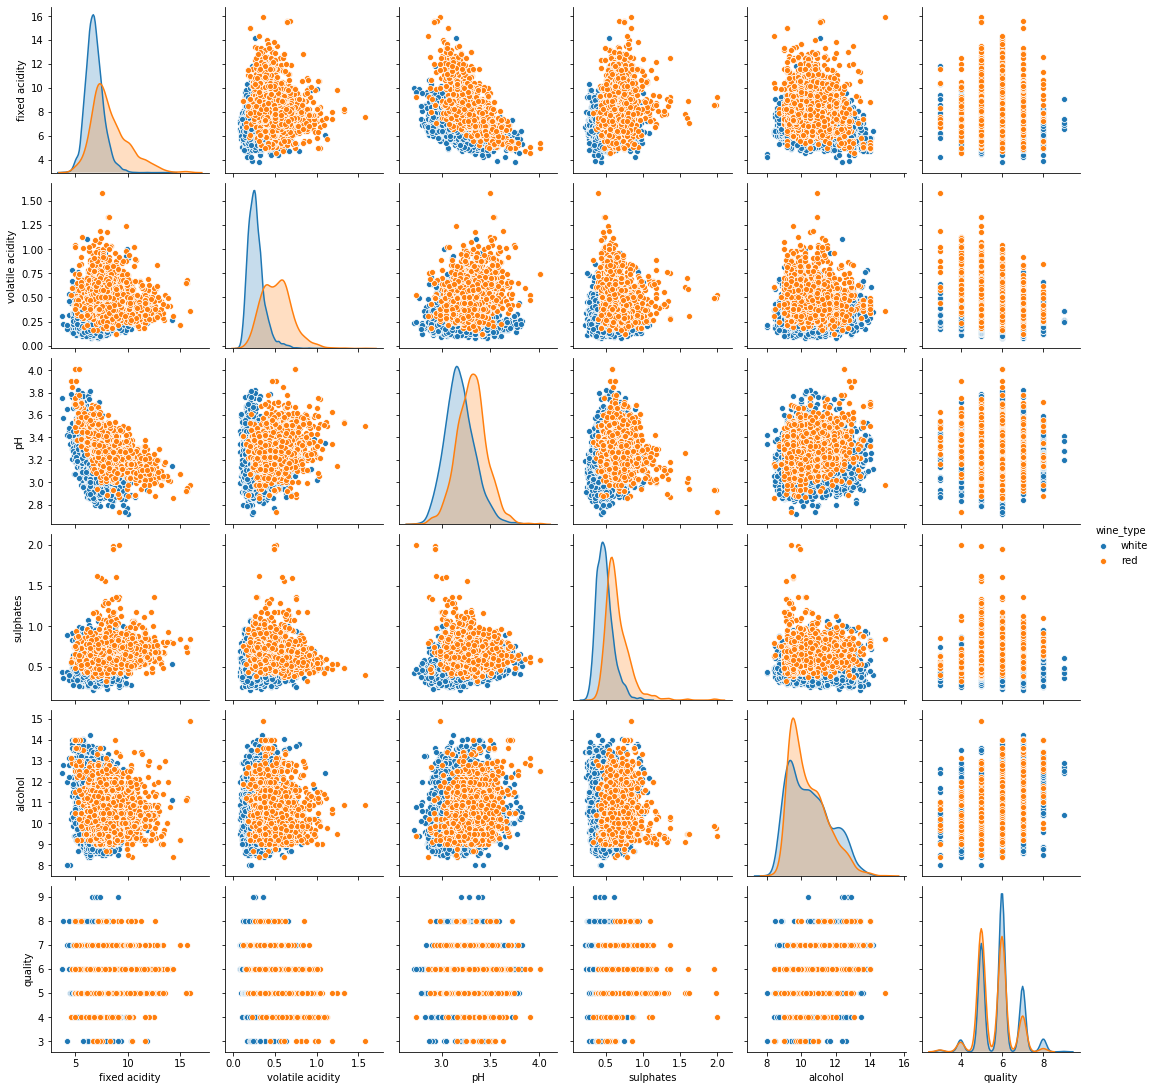

In [29]:
cols = ['fixed acidity', 'volatile acidity', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']
sns.pairplot(wines_df[cols], hue = 'wine_type')

- Red wines have higher sulphate levels as compared to white wines
- High quality wines have lower sulphate levels & volatile acidity
- volatile acid levels in red wines are higher as compared to white wines

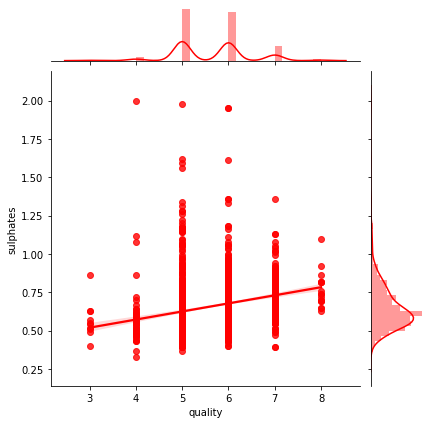

In [30]:
sns.jointplot(x='quality', y='sulphates', data=red_wine, kind='reg', color='red')

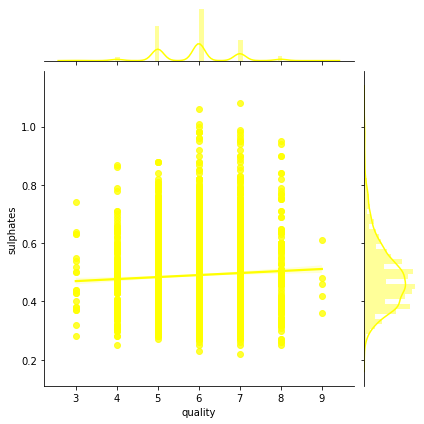

In [31]:
sns.jointplot(x='quality', y='sulphates', data=white_wine, kind='reg', color='yellow')

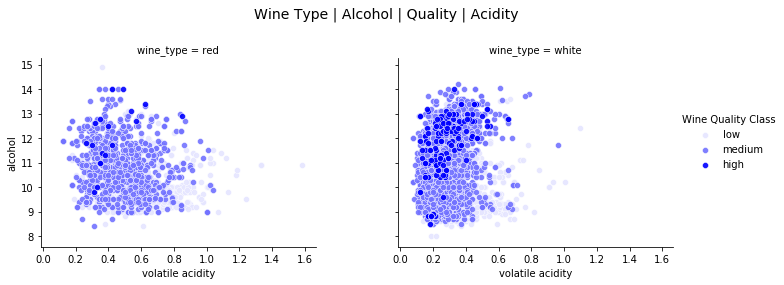

In [33]:
g = sns.FacetGrid(wines_df, col="wine_type", hue='quality_label', col_order=['red', 'white'], 
                  hue_order=['low', 'medium', 'high'], aspect=1.2, height=4, palette=sns.light_palette('blue', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type | Alcohol | Quality | Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

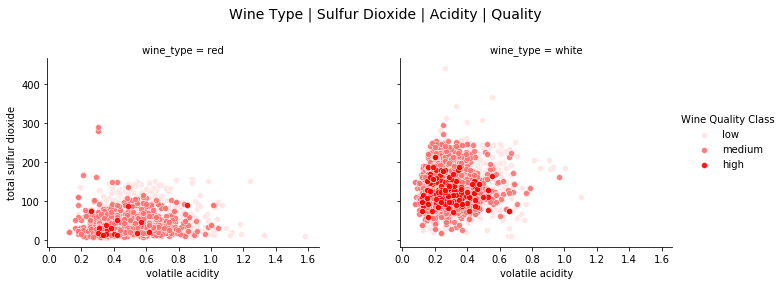

In [34]:
g = sns.FacetGrid(wines_df, col="wine_type", hue='quality_label', col_order=['red', 'white'], 
                  hue_order=['low', 'medium', 'high'], aspect=1.2, height=4, palette=sns.light_palette('red', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9,
edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type | Sulfur Dioxide | Acidity | Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

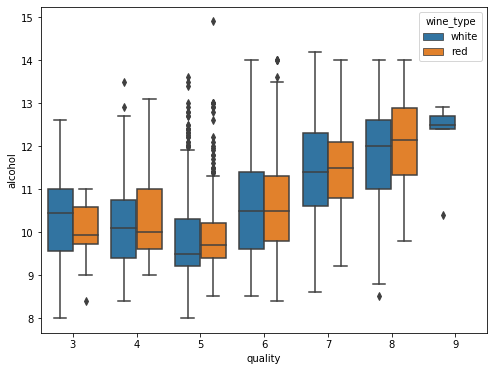

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quality", y="alcohol", hue="wine_type", data=wines_df)

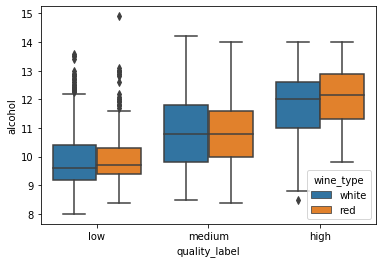

In [36]:
sns.boxplot(x="quality_label", y="alcohol", hue="wine_type", data=wines_df)

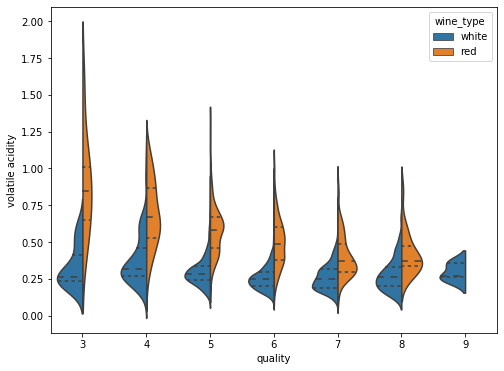

In [37]:
plt.figure(figsize=(8,6))
sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", data=wines_df, split=True, inner="quart")

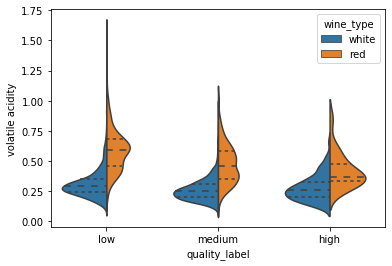

In [38]:
sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type", data=wines_df, split=True, inner="quart")

### 3-D visualization

In [39]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Total sulfur dioxide')

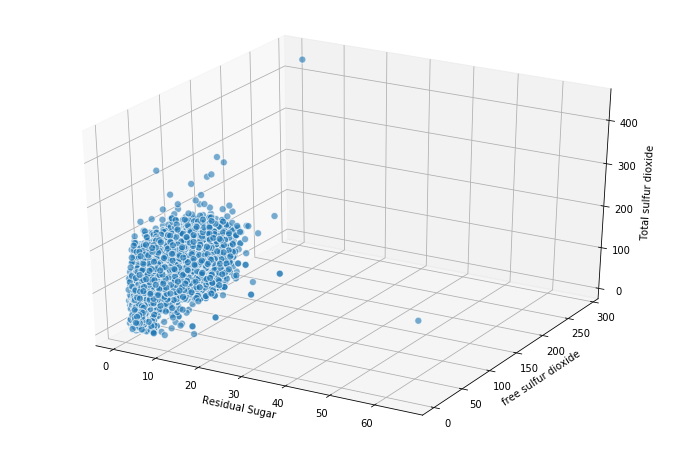

In [40]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
xscale = wines_df['residual sugar']
yscale = wines_df['free sulfur dioxide']
zscale = wines_df['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')

## Model Development & Evaluation

### Prediciting wine type

In [41]:
# Feature selection
feat_cols =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wines_df[feat_cols]
y = wines_df['wine_type']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [43]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

#### 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Model fitting
lr.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Model prediction
wt_lr_pred = lr.predict(scaled_X_test)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [48]:
# Performance evaluation
from sklearn import metrics
import itertools
wt_lr_accuracy = metrics.accuracy_score(y_test, wt_lr_pred)
print("Wine Type | Log. Reg. | Accuracy: %0.3f" % wt_lr_accuracy)
wt_lr_report = metrics.classification_report(y_test, wt_lr_pred)
print("Wine Type | Log. Reg. | Clf Report:\n", wt_lr_report)

Wine Type | Log. Reg. | Accuracy: 0.994
Wine Type | Log. Reg. | Clf Report:
               precision    recall  f1-score   support

         red       0.98      0.99      0.99       503
       white       1.00      0.99      1.00      1447

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



Confusion matrix, without normalization


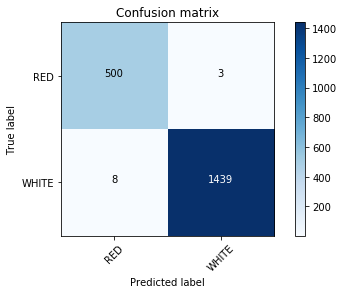

In [49]:
wt_lr_cm = metrics.confusion_matrix(y_test, wt_lr_pred)
plot_confusion_matrix(wt_lr_cm, classes = ['RED', 'WHITE'])

#### 2. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
wt_rf_pred = rf.predict(X_test)

In [53]:
wt_rf_accuracy = metrics.accuracy_score(y_test, wt_rf_pred)
print("Wine Type | Random Forest | Accuracy: %0.3f" % wt_rf_accuracy)
wt_rf_report = metrics.classification_report(y_test, wt_rf_pred)
print("Wine Type | Random Forest | Clf Report:\n", wt_rf_report)

Wine Type | Random Forest | Accuracy: 0.994
Wine Type | Random Forest | Clf Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       503
       white       1.00      1.00      1.00      1447

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



Confusion matrix, without normalization


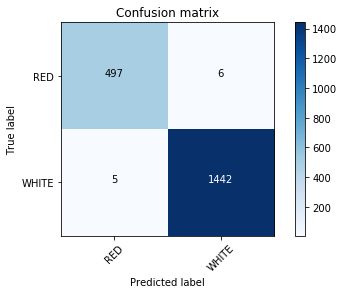

In [54]:
wt_rf_cm = metrics.confusion_matrix(y_test, wt_rf_pred)
plot_confusion_matrix(wt_rf_cm, classes = ['RED', 'WHITE'])

### Predicting Wine Quality

In [55]:
# Feature selection
feat_cols =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wines_df[feat_cols]
y = wines_df['quality_label']

In [56]:
y

0       medium
1          low
2          low
3       medium
4          low
         ...  
6492    medium
6493    medium
6494    medium
6495       low
6496    medium
Name: quality_label, Length: 6497, dtype: category
Categories (3, object): [low, medium, high]

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [58]:
y

array([2, 1, 1, ..., 2, 1, 2])

In [59]:
list(le.inverse_transform([0, 1, 2]))

['high', 'low', 'medium']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#### 1. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [62]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [63]:
# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

wq_clf = GridSearchCV(RandomForestClassifier(random_state=4), param_grid, cv=10, scoring='accuracy')
wq_clf.fit(X_train, y_train)
print(wq_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [64]:
param_grid = {
                'n_estimators': [90, 100, 110] 
              }

wq_clf = GridSearchCV(RandomForestClassifier(random_state=4), param_grid, cv=10, scoring='accuracy')
wq_clf.fit(X_train, y_train)
print(wq_clf.best_params_)

{'n_estimators': 100}


In [65]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto')

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
wq_rf_pred = rf.predict(X_test)

In [68]:
wq_rf_accuracy = metrics.accuracy_score(y_test, wq_rf_pred)
print("Wine Quality | Random Forest | Accuracy: %0.3f" % wq_rf_accuracy)
wq_rf_report = metrics.classification_report(y_test, wq_rf_pred)
print("Wine Quality | Random Forest | Clf Report:\n", wq_rf_report)

Wine Quality | Random Forest | Accuracy: 0.814
Wine Quality | Random Forest | Clf Report:
               precision    recall  f1-score   support

           0       0.96      0.34      0.51        67
           1       0.79      0.74      0.77       705
           2       0.82      0.89      0.85      1178

    accuracy                           0.81      1950
   macro avg       0.86      0.66      0.71      1950
weighted avg       0.82      0.81      0.81      1950



Confusion matrix, without normalization


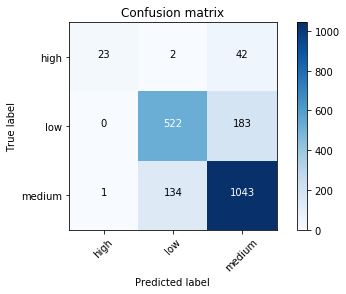

In [69]:
wq_rf_cm = metrics.confusion_matrix(y_test, wq_rf_pred)
plot_confusion_matrix(wq_rf_cm, classes = list(le.inverse_transform([0, 1, 2])))

Text(0.5, 1.0, 'Random Forest | Feature Importances')

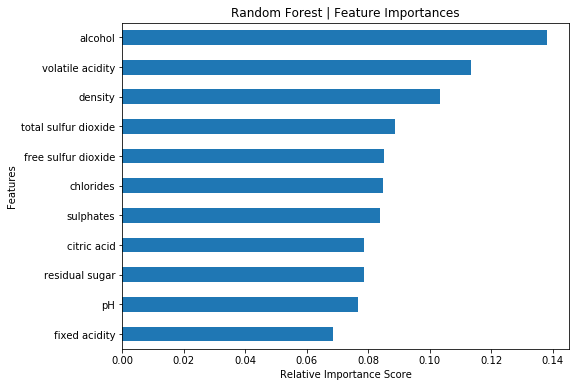

In [70]:
wq_rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
wq_rf_feature_importances.sort_values().plot(kind='barh')
plt.xlabel("Relative Importance Score")
plt.ylabel("Features")
plt.title("Random Forest | Feature Importances")

#### 2. XG Boost Classifier

In [71]:
import xgboost as xgb

In [72]:
xgc = xgb.XGBClassifier(seed=4)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4,
              silent=None, subsample=1, verbosity=1)

In [73]:
param_grid = {
                'n_estimators': [100, 200, 300], 
                'max_depth': [5, 10, 15],
                'learning_rate': [0.3, 0.5]
              }

wqp_clf = GridSearchCV(xgb.XGBClassifier(tree_method='exact', seed=4), param_grid, 
                       cv=10, scoring='accuracy')
wqp_clf.fit(X_train, y_train)
print(wqp_clf.best_params_)

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}


In [74]:
xgc = xgb.XGBClassifier(seed=4, learning_rate=0.3, max_depth=10, n_estimators=100)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4,
              silent=None, subsample=1, verbosity=1)

In [75]:
wq_xgc_pred = xgc.predict(X_test)

In [76]:
wq_xgc_accuracy = metrics.accuracy_score(y_test, wq_xgc_pred)
print("Wine Quality | XGBoost | Accuracy: %0.3f" % wq_xgc_accuracy)
wq_xgc_report = metrics.classification_report(y_test, wq_xgc_pred)
print("Wine Quality | XGBoost | Clf Report:\n", wq_xgc_report)

Wine Quality | XGBoost | Accuracy: 0.801
Wine Quality | XGBoost | Clf Report:
               precision    recall  f1-score   support

           0       0.96      0.34      0.51        67
           1       0.77      0.73      0.75       705
           2       0.81      0.87      0.84      1178

    accuracy                           0.80      1950
   macro avg       0.85      0.65      0.70      1950
weighted avg       0.80      0.80      0.80      1950



Confusion matrix, without normalization


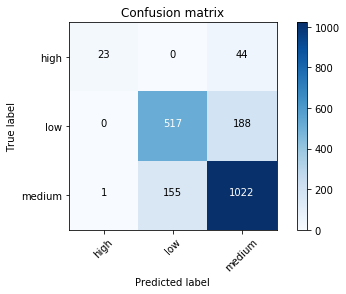

In [77]:
wq_xgc_cm = metrics.confusion_matrix(y_test, wq_xgc_pred)
plot_confusion_matrix(wq_xgc_cm, classes = list(le.inverse_transform([0, 1, 2])))

Text(0.5, 1.0, 'XGBoost | Feature Importances')

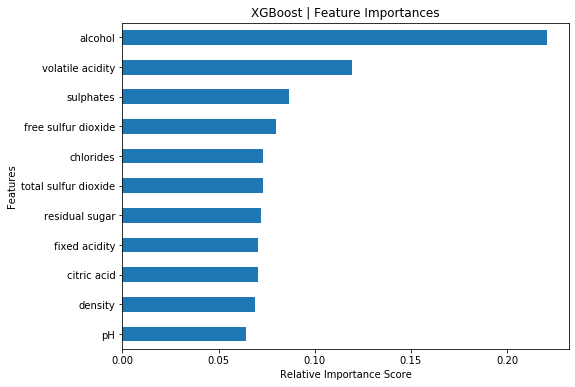

In [78]:
wq_xgc_feature_importances = pd.Series(xgc.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
wq_xgc_feature_importances.sort_values().plot(kind='barh')
plt.xlabel("Relative Importance Score")
plt.ylabel("Features")
plt.title("XGBoost | Feature Importances")